# Introduzione

Quello che vogliamo ricavare ora è il prezzo di un'opzione call e put. 
Affinchè questo possa essere fatto in modo semplice, avanziamo lipotesi di mercato efficiente (ossia l'approssimazione più elementare per l'interazione fra gli agenti di mercato) per cui il prezzo delle opzioni è descritto dal modello di Black-Scholes. In particolare, questo implica che la variazione del prezzo segue un moto browniano goemetrico in cui il drif e la volatilità sono costanti. 
In questo contesto teorico è possibile ricavare il prezzo di un'opzione call e put sia analiticamente sia numericamente. Quello che ci aspettiamo è che in media, il risultato ottenuto numericamente converga al valore analitico.  
Per ricavare il prezzo numericamente si può procedere in due modi distinti:
* **Metodo diretto**: in questo caso simuliamo $M=10^4$ volte il comportamento del prezzo conoscendo la sua evoluzione stocastica fino al tempo $T$ partendo dal tempo $t=0$.
$$S(T) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)T
    +\sigma Z_{i}\sqrt{T}\right] \quad \text{dove}\quad Z_i = \mathcal N(0,1)$$
* **Metodo indiretto**: in questo caso assumiamo di conoscere unicamente la variazione infinitesima di prezzo $S(t+dt)=f(S(t))$ e da questa risaliamo al prezzo al tempo $T$. Dopodiché ripetiamo il processo $M=10^4$ volte così da ricavare una stima media. 

Confrontiamo quindi le stime per le opzioni call & put attraverso i due metodi con le stime analitiche.

In [1]:
import matplotlib as cm
import matplotlib.pyplot as plt
import numpy as np
import math
import string
from scipy.optimize import curve_fit
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stat
import pandas as pd
import subprocess as sb
from os import system
import os
import shutil
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

sns.set_theme(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)

In [2]:
# Carico i dati dai file
file_direct= "Exercises_03.1/file_direct.txt"
file_step = "Exercises_03.1/file_step.txt"

C_direct_mean, C_direct_std, P_direct, P_direct_std = np.loadtxt(file_direct,delimiter = ",", unpack = True)
C_step_mean, C_step_std, P_step, P_step_std = np.loadtxt(file_step,delimiter = ",", unpack = True)


n_rep = np.shape(C_direct_mean)[0]

In [3]:
# Genero i valori attesi
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / np.sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * np.sqrt(T)
    C = S0 * N(d1) - K * np.exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * np.exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma) 

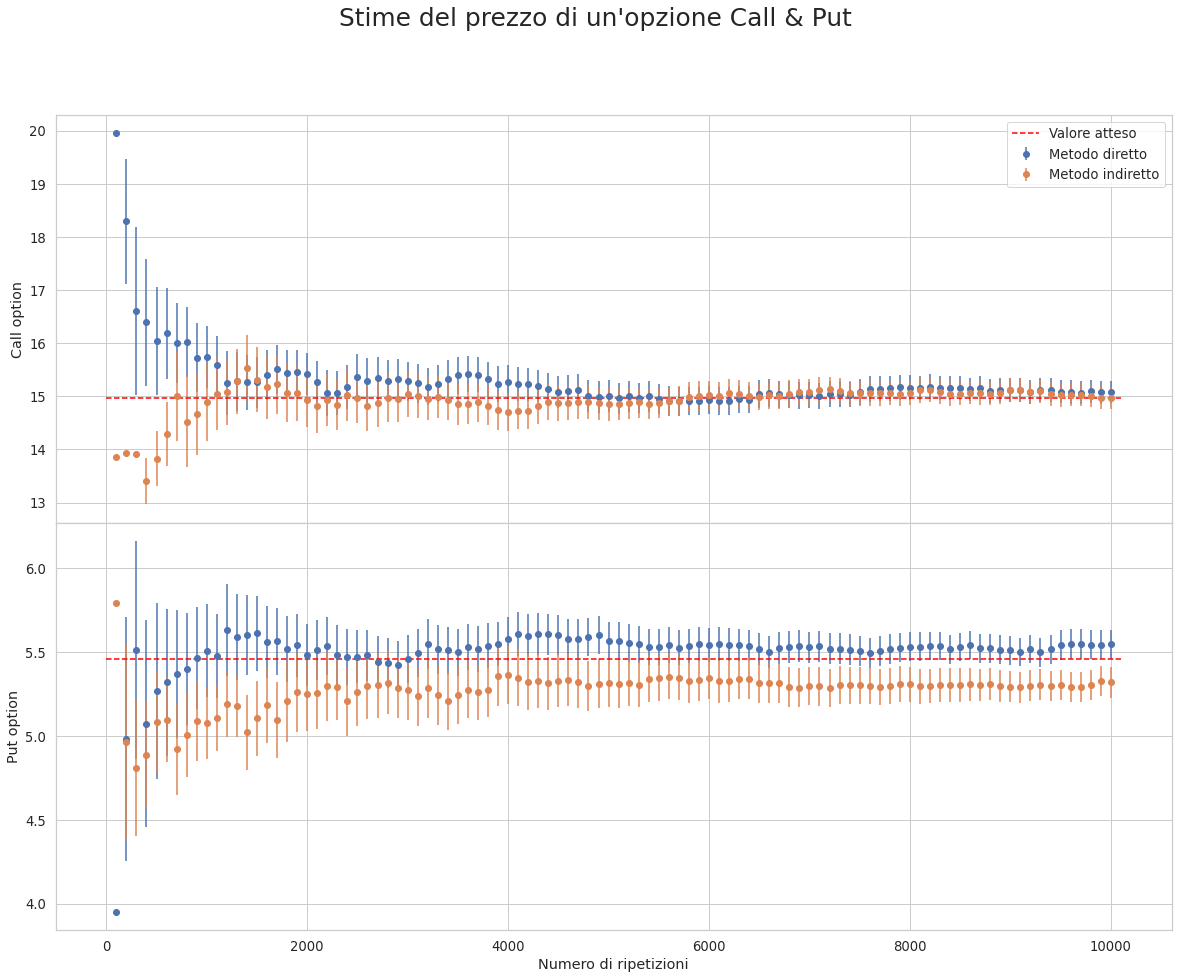

In [4]:
fig = plt.figure(figsize=(20,15))

fig.suptitle(f"Stime del prezzo di un'opzione Call & Put", fontsize='xx-large');
fig

gs = fig.add_gridspec(2, 1, hspace=0, wspace=0)

(ax1,ax2) = gs.subplots(sharex='col');

ax1.errorbar(
    np.arange(1,(n_rep+1))*100,
    C_direct_mean,
    yerr = C_direct_std,  
    marker='o', linestyle="", label='Metodo diretto'
);

ax1.errorbar(
    np.arange(1,(n_rep+1))*100,
    C_step_mean,
    yerr = C_step_std,  
    marker='o', linestyle="", label='Metodo indiretto'
);

ax2.errorbar(
    np.arange(1,(n_rep+1))*100,
    P_direct,
    yerr = P_direct_std,  
    marker='o', linestyle="", label=r'Putt option', 
);

ax2.errorbar(
    np.arange(1,(n_rep+1))*100,
    P_step,
    yerr = P_step_std,  
    marker='o', linestyle="", label=r'Putt option', 
);


ax1.hlines(call,0,(n_rep+1)*100, colors='red', linestyle='--', label='Valore atteso');
ax1.grid(True);


ax1.set_xlabel(r"Numero di ripetizioni",  );
ax1.set_ylabel(r"Call option" ,  );
ax2.set_xlabel(r"Numero di ripetizioni",  );
ax2.set_ylabel(r"Put option" , );

ax1.legend(frameon=True);

ax2.hlines(put,0,(n_rep+1)*100, colors='red', linestyle='--', label='Valore atteso');
ax2.grid(True);



> Concludiamo che in media l'evoluzione stocastica converge alla stima analitica del modello. 